# Machine Learning Project 

### Student: 
- Le Thi Hoa
- Tran Hai Linh

### Supervisor: 
- Assoc.Prof.Cazabet Rémy

## **Dataset: Customer Segmentation Classification**
- This dataset was acquired from the Analytics Vidhya hackathon

### **Context**
- An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.
- In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.
- You are required to help the manager to predict the right group of the new customers.

### Columns in dataset: 
- **ID** - Unique ID
- **Gender** - Gender of the customer
- **Ever_Married** - Marital status of the customer
- **Age** - Age of the customer
- **Graduated** - Is the customer a graduate?
- **Profession** - Profession of the customer
- **Work_Experience** - Work Experience in years
- **Spending_Score** - Spending score of the customer
- **Family_Size** - Number of family members for the customer (including the customer)
- **Var_1** - Anonymised Category for the customer
- **Segmentation** - (target) Customer Segment of the customer


In [82]:
# Import required libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load data

In [83]:
data_df = pd.read_csv("Data/train.csv")
data_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [84]:
data_df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


### Basic information

In [85]:
print(f"Shape of the dataset:  \n\t{data_df.shape[0]} rows \n\t{data_df.shape[1]} columns")

Shape of the dataset:  
	8068 rows 
	11 columns


#### Columns Name

In [86]:
print("The columns of the dataset: \n")
columns_df = pd.DataFrame(data_df.columns, columns=['Column Names'])
columns_df

The columns of the dataset: 



,Column Names
0,ID
1,Gender
2,Ever_Married
3,Age
4,Graduated
5,Profession
6,Work_Experience
7,Spending_Score
8,Family_Size
9,Var_1


#### Data type

In [87]:
# Display data type of each column
data_types = data_df.dtypes
print("Data types of each column: \n")
print(data_types)

Data types of each column: 

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


#### Genaral information

In [88]:
print("General information about the dataset: \n")
print(data_df.info())

General information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


#### Basic Statistic

In [89]:
print("Statistical summary description: \n")
data_df.describe() 

Statistical summary description: 



,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


#### Missing Values

In [90]:
# Check for missing values in the DataFrame
missing_values = data_df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data_df)) * 100

# Create a DataFrame containing information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the count of missing values for each column
print("The count of missing values for each column: \n")
missing_info

The count of missing values for each column: 



,Missing Values,Percentage
ID,0,0.000000
Gender,0,0.000000
Ever_Married,140,1.735250
Age,0,0.000000
Graduated,78,0.966782
Profession,124,1.536936
Work_Experience,829,10.275161
Spending_Score,0,0.000000
Family_Size,335,4.152206
Var_1,76,0.941993


#### Duplicate values 

In [91]:
# Check for duplicates in the dataset
duplicates = data_df.duplicated()

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicates.sum() / len(data_df)) * 100

# Information about duplicates
print(f"\nTotal number of duplicate rows: {duplicates.sum()}")
print(f"Percentage of duplicate: {duplicate_percentage:.2f}%")

# Display duplicate rows
data_df[duplicates].head(10)


Total number of duplicate rows: 0
Percentage of duplicate: 0.00%


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


#### Number of Unique Values

In [92]:
# Use nunique() to count the number of unique values in each column
unique_counts = data_df.nunique()
print(f"Number of unique values for each column \n {unique_counts}")

Number of unique values for each column 
 ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64


#### Segmentation distributions

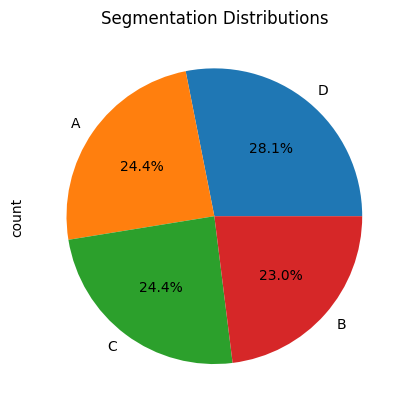

In [93]:
data_df['Segmentation'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Segmentation Distributions")
plt.show()

### Data Cleaning

#### Ever_Married

In [94]:
data_df["Ever_Married"].value_counts()

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

<Axes: >

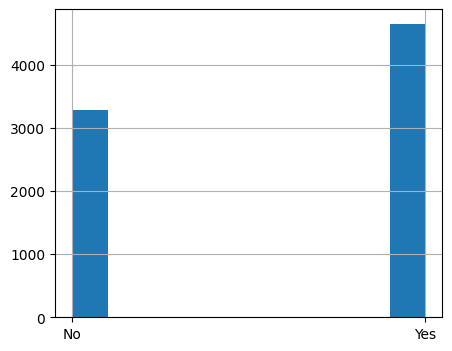

In [95]:
plt.figure(figsize=(5, 4))
data_df['Ever_Married'].hist()

In [96]:
# Fill missing values in column 'Ever_Married' of data using "forward fill" (ffill) method
data_df["Ever_Married"] = data_df['Ever_Married'].fillna(method='ffill')

# column "Ever_Married" after handle missing values
data_df["Ever_Married"].value_counts()

Ever_Married
Yes    4722
No     3346
Name: count, dtype: int64

#### Graduated Column

In [97]:
data_df["Graduated"].value_counts()

Graduated
Yes    4968
No     3022
Name: count, dtype: int64

Text(0, 0.5, 'Count')

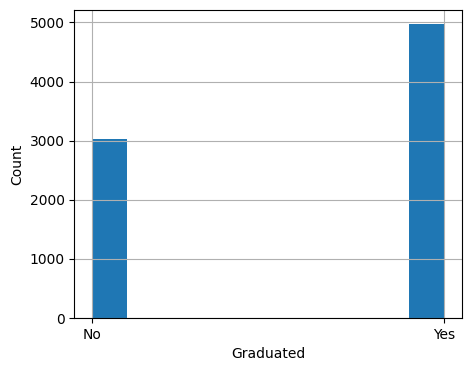

In [98]:
plt.figure(figsize=(5, 4))
data_df['Graduated'].hist(bins=10)
plt.xlabel("Graduated")
plt.ylabel("Count")

In [99]:
# Fill missing values in column 'Graduated' of data using "forward fill" (ffill) method
data_df["Graduated"] = data_df['Graduated'].fillna(method='ffill')

# column "Graduated" after handle missing values
data_df["Graduated"].value_counts()

Graduated
Yes    5021
No     3047
Name: count, dtype: int64

#### Profession

In [100]:
data_df["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

Text(0.5, 0, 'Profession')

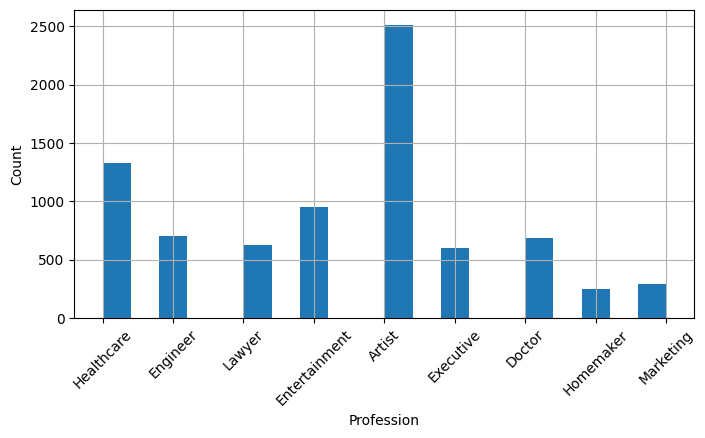

In [101]:
plt.figure(figsize=(8, 4))
data_df['Profession'].hist(bins=20)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Profession")

In [102]:
# Fill missing values in column 'Procession' of data using "forward fill" (ffill) method
data_df["Profession"] = data_df['Profession'].fillna(method='ffill')

# column "Profession" after handle missing values
data_df["Profession"].value_counts()

Profession
Artist           2555
Healthcare       1353
Entertainment     963
Engineer          704
Doctor            703
Lawyer            636
Executive         605
Marketing         299
Homemaker         250
Name: count, dtype: int64

#### Work_Experience

In [103]:
data_df["Work_Experience"].value_counts()

Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64

Text(0.5, 0, 'Work_Experience')

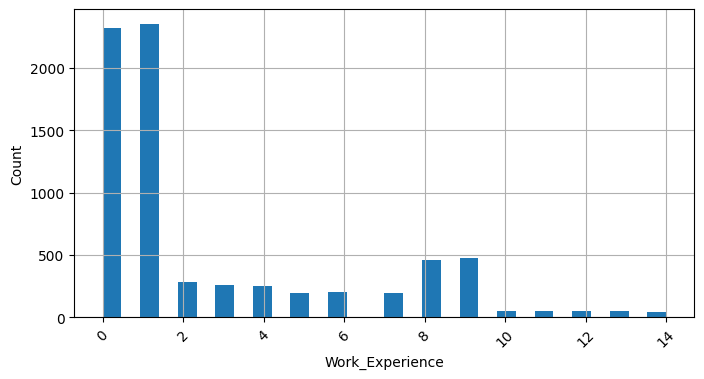

In [104]:
plt.figure(figsize=(8, 4))
data_df['Work_Experience'].hist(bins=30)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Work_Experience")

In [113]:
# Fill missing values in column 'Work_Experience' of data using "forward fill" (ffill) method
data_df["Work_Experience"] = data_df['Work_Experience'].fillna(method='ffill')

# column "Profession" after handle missing values
data_df["Work_Experience"].value_counts()

Work_Experience
1.0     2622
0.0     2604
9.0      522
8.0      515
2.0      325
3.0      285
4.0      281
6.0      226
7.0      221
5.0      205
10.0      56
11.0      55
14.0      53
12.0      50
13.0      48
Name: count, dtype: int64

#### Family_Size & Var_1

In [106]:
# Count value of column "Family_Size"
data_df["Family_Size"].value_counts()

Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64

In [107]:
# Count value of column "Var_1"
data_df["Var_1"].value_counts()

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

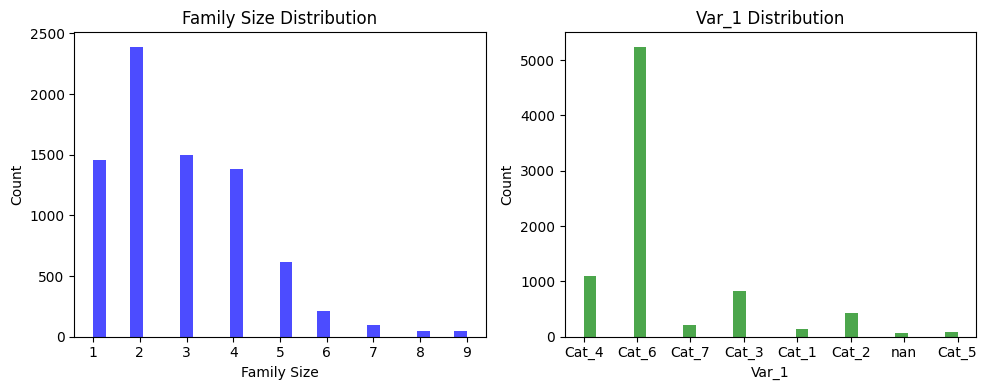

In [108]:
import matplotlib.pyplot as plt

# Tạo một hình với 1 dòng và 2 cột
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histogram for column 'Family_Size'
axes[0].hist(data_df['Family_Size'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Family Size Distribution')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Count')

# Histogram for column 'Var_1"
axes[1].hist(data_df['Var_1'].astype(str), bins=30, color='green', alpha=0.7)
axes[1].set_title('Var_1 Distribution')
axes[1].set_xlabel('Var_1')
axes[1].set_ylabel('Count')

# Increase the distance between graphs
plt.tight_layout()

# Show chart
plt.show()


In [109]:
# Fill missing values in column 'Family_Size' and "Var_1" of data using "forward fill" (ffill) method
data_df['Var_1'] = data_df['Var_1'].fillna(method='ffill')
data_df['Family_Size'] = data_df['Family_Size'].fillna(method='ffill')

In [116]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Outlier Values

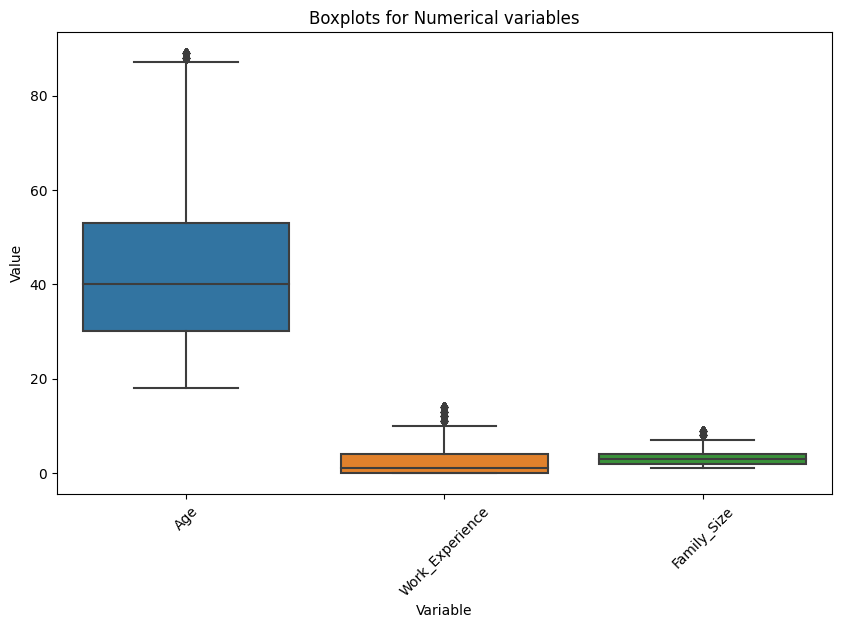

In [124]:
# Create a new DataFrame in "long format" using the melt function
data_long = pd.melt(data_df[["Age", "Work_Experience", "Family_Size"]], var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
plt.title("Boxplots for Numerical variables")
# Draw boxplots for the variables
bp = sns.boxplot(x='Variable', y='Value', data=data_long)
bp.set_xticklabels(bp.get_xticklabels(), rotation=45)
# Display
plt.show()

In [125]:
# Percentage of outliers present in each variable
outlier_percentage = {}
numerical_features = ["Age", "Work_Experience", "Family_Size"]
for feature in numerical_features:
    tempData = data_df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'Age': 0.88, 'Work_Experience': 2.55, 'Family_Size': 1.19}

### EDA

Text(0.5, 1.08, 'Pair Plot Analysis')

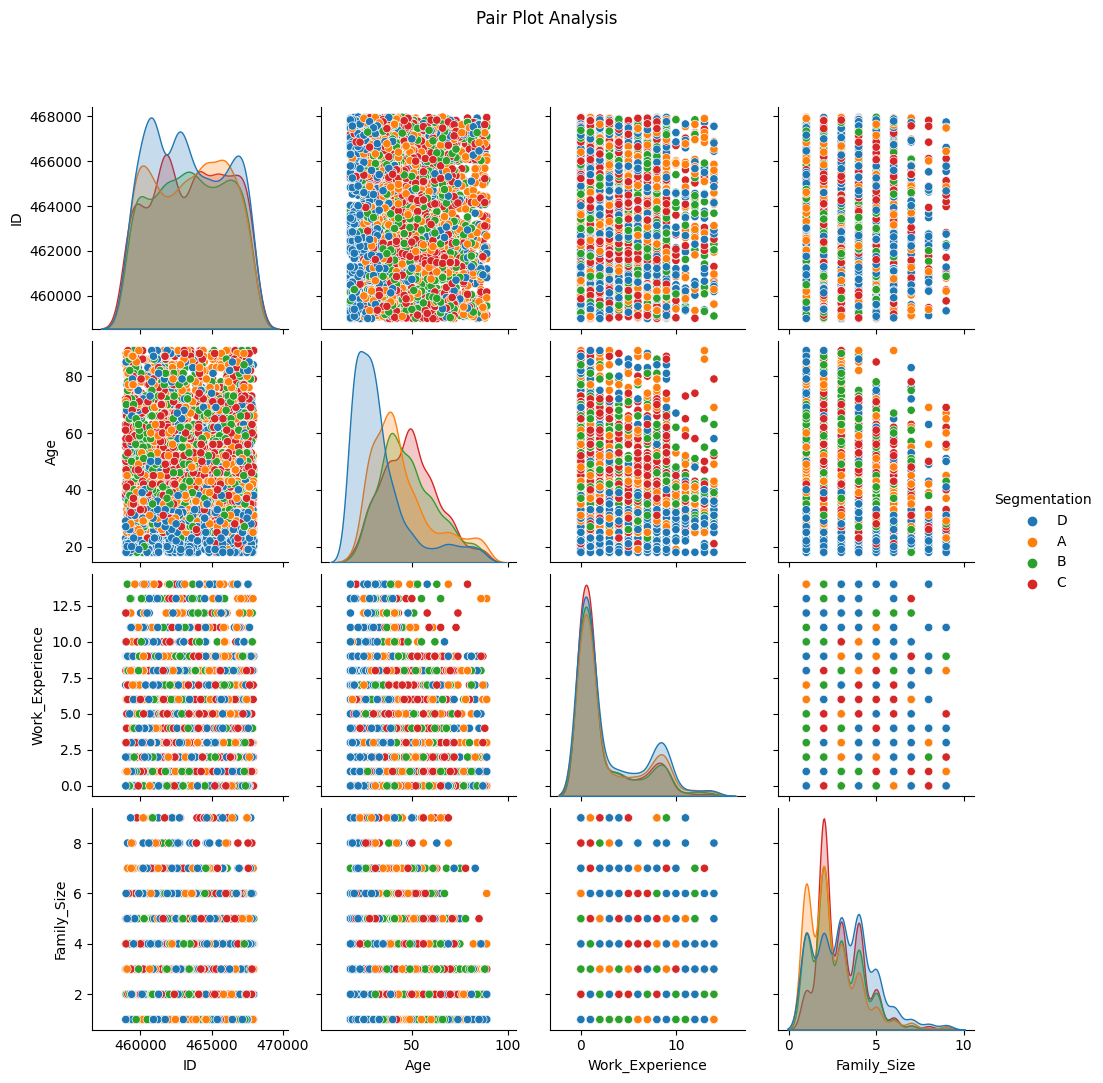

In [127]:
label ={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}
plotdata = sns.pairplot(data_df.replace({'Segmentation' : label}), hue = 'Segmentation')
plotdata.fig.suptitle("Pair Plot Analysis", y = 1.08)